# Phase 1 project
##### Student Name: Perpetua M.N. Murugi

Tableau link https://public.tableau.com/authoring/Metricsforsafeaircraftselection_p/Dashboard1#1


### PROJECT OVERVIEW
Our company is expanding into new industries to diversify its portfolio. They are interested in purchasing and operating  airplanes for commercial and private enterprises. However, they lack the necessary experience in the aviation industry to know the risk associated with aircrafts.This requires risk assessment and recommendation for Aircraft acquisition based on the data available.

### PROBLEM STATEMENT
Our company lacks experience in aircraft ownership and operation. This presents a significant challenge in choosing the make and  model with the lowest risk to invest in. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


### OBJECTIVE
To identify and evaluate the risks associated with various aircraft models 

To guide the company's decision-making process in acquiring aircraft for commercial and private enterprises.

To recommend aircraft options that present the lowest risk, ensuring a successful and sustainable entry into the aviation industry.

In [1]:
# importing needed libraries
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the data set

In [2]:
df_1=pd.read_csv('AviationData.csv',encoding='ISO-8859-1')
df_1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df_2=pd.read_csv('USState_Codes.csv',encoding='ISO-8859-1')
df_2

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [4]:
df=df_1
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.shape 
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 88889 rows and 31 columns


In [6]:
#clean the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
df.columns 

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### Cleaning the data
This includes choosing the relevant colums to work with. Dealing with duplicates and missing values.
The number of missing values is significantly high we will need to replace the missing values with mode since the standard deviation is high.
We shall use the mode to replace the missing values in Injuries columns. We will then drop the remaing  null values in our data frame after the replacing the columns named above with the calculated mode

In [8]:
#choosing the relevant columns to use in our data frame.Drop the columns with a significant number of null values as well
df_new=df[['Event.Id','Event.Date','Investigation.Type', 'Make','Model','Engine.Type','Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition']]
df_new

,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,1948-10-24,Accident,Stinson,108-3,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,Accident,Piper,PA24-180,Reciprocating,Destroyed,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,Accident,Cessna,172M,Reciprocating,Destroyed,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,Accident,Rockwell,112,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,Accident,Cessna,501,NaN,Destroyed,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,Accident,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,2022-12-26,Accident,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,2022-12-26,Accident,AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,Substantial,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,2022-12-26,Accident,CESSNA,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [9]:
df_new.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,77488.000000,76379.000000,76956.000000,82977.000000
mean,0.647855,0.279881,0.357061,5.325440
std,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


In [10]:
#checking for duplicates
df_new.duplicated().sum()

44

In [11]:
#to check if the duplicates are present in the event id column.This duplicate would affect our results.
df_new.duplicated(subset='Event.Id', keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [12]:
#The event Id column does not have duplicates.Lets check for null values
df_new.isna().sum()

Event.Id                      0
Event.Date                    0
Investigation.Type            0
Make                         63
Model                        92
Engine.Type                7096
Aircraft.damage            3194
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [13]:
df_new.mode()


,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001212X19172,1982-05-16,Accident,Cessna,152,Reciprocating,Substantial,0.0,0.0,0.0,0.0,VMC
1,20001214X45071,1984-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#replacing the missing values with zero since its the mode
DF=df_new.fillna({'Total.Fatal.Injuries':0, 'Total.Serious.Injuries':0, 'Total.Minor.Injuries':0, 'Total.Uninjured':0,})
DF


,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,1948-10-24,Accident,Stinson,108-3,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,Accident,Piper,PA24-180,Reciprocating,Destroyed,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,Accident,Cessna,172M,Reciprocating,Destroyed,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,Accident,Rockwell,112,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,Accident,Cessna,501,NaN,Destroyed,1.0,2.0,0.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,Accident,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,2022-12-26,Accident,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,2022-12-26,Accident,AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,Substantial,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,2022-12-26,Accident,CESSNA,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [15]:
#We can now drop the remaining null values in the data set
DF=DF.dropna()
DF

,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,1948-10-24,Accident,Stinson,108-3,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,Accident,Piper,PA24-180,Reciprocating,Destroyed,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,Accident,Cessna,172M,Reciprocating,Destroyed,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,Accident,Rockwell,112,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,IMC
5,20170710X52551,1979-09-17,Accident,Mcdonnell Douglas,DC9,Turbo Fan,Substantial,0.0,0.0,1.0,44.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,Accident,CESSNA,150,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC
88647,20221011106098,2022-10-08,Accident,CESSNA,177RG,Reciprocating,Substantial,0.0,0.0,0.0,2.0,VMC
88661,20221018106153,2022-10-13,Accident,BEECH,B-60,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC
88735,20221031106231,2022-10-29,Accident,STEPHEN J HOFFMAN,MS-500,Reciprocating,Substantial,0.0,1.0,0.0,0.0,VMC


In [16]:
#Filter the investigation type to show accidents only

DF=DF[DF['Investigation.Type']=='Accident']
DF

,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,1948-10-24,Accident,Stinson,108-3,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,Accident,Piper,PA24-180,Reciprocating,Destroyed,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,Accident,Cessna,172M,Reciprocating,Destroyed,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,Accident,Rockwell,112,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,IMC
5,20170710X52551,1979-09-17,Accident,Mcdonnell Douglas,DC9,Turbo Fan,Substantial,0.0,0.0,1.0,44.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,Accident,CESSNA,150,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC
88647,20221011106098,2022-10-08,Accident,CESSNA,177RG,Reciprocating,Substantial,0.0,0.0,0.0,2.0,VMC
88661,20221018106153,2022-10-13,Accident,BEECH,B-60,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC
88735,20221031106231,2022-10-29,Accident,STEPHEN J HOFFMAN,MS-500,Reciprocating,Substantial,0.0,1.0,0.0,0.0,VMC


In [17]:
#introding a Total.Injuries column
DF['Total.Injuries'] = (DF['Total.Fatal.Injuries'] +
                        DF['Total.Serious.Injuries'] +
                        DF['Total.Minor.Injuries'])
DF

,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Injuries
0,20001218X45444,1948-10-24,Accident,Stinson,108-3,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,UNK,2.0
1,20001218X45447,1962-07-19,Accident,Piper,PA24-180,Reciprocating,Destroyed,4.0,0.0,0.0,0.0,UNK,4.0
2,20061025X01555,1974-08-30,Accident,Cessna,172M,Reciprocating,Destroyed,3.0,0.0,0.0,0.0,IMC,3.0
3,20001218X45448,1977-06-19,Accident,Rockwell,112,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,IMC,2.0
5,20170710X52551,1979-09-17,Accident,Mcdonnell Douglas,DC9,Turbo Fan,Substantial,0.0,0.0,1.0,44.0,VMC,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,Accident,CESSNA,150,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC,0.0
88647,20221011106098,2022-10-08,Accident,CESSNA,177RG,Reciprocating,Substantial,0.0,0.0,0.0,2.0,VMC,0.0
88661,20221018106153,2022-10-13,Accident,BEECH,B-60,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC,0.0
88735,20221031106231,2022-10-29,Accident,STEPHEN J HOFFMAN,MS-500,Reciprocating,Substantial,0.0,1.0,0.0,0.0,VMC,1.0


### Analyzing the data
We are basing our analysis on
1. The degree of damage to aircraft after an accident
2. The aircraft with the least number of accidents
3. The accidents with the least number of total injuries
 

In [18]:
#We'll first add a column named Aircraft to merge the make and model column.

DF['Aircraft']  = DF['Make']+'-'+DF['Model']
DF

,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Injuries,Aircraft
0,20001218X45444,1948-10-24,Accident,Stinson,108-3,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,UNK,2.0,Stinson-108-3
1,20001218X45447,1962-07-19,Accident,Piper,PA24-180,Reciprocating,Destroyed,4.0,0.0,0.0,0.0,UNK,4.0,Piper-PA24-180
2,20061025X01555,1974-08-30,Accident,Cessna,172M,Reciprocating,Destroyed,3.0,0.0,0.0,0.0,IMC,3.0,Cessna-172M
3,20001218X45448,1977-06-19,Accident,Rockwell,112,Reciprocating,Destroyed,2.0,0.0,0.0,0.0,IMC,2.0,Rockwell-112
5,20170710X52551,1979-09-17,Accident,Mcdonnell Douglas,DC9,Turbo Fan,Substantial,0.0,0.0,1.0,44.0,VMC,1.0,Mcdonnell Douglas-DC9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,Accident,CESSNA,150,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC,0.0,CESSNA-150
88647,20221011106098,2022-10-08,Accident,CESSNA,177RG,Reciprocating,Substantial,0.0,0.0,0.0,2.0,VMC,0.0,CESSNA-177RG
88661,20221018106153,2022-10-13,Accident,BEECH,B-60,Reciprocating,Substantial,0.0,0.0,0.0,1.0,VMC,0.0,BEECH-B-60
88735,20221031106231,2022-10-29,Accident,STEPHEN J HOFFMAN,MS-500,Reciprocating,Substantial,0.0,1.0,0.0,0.0,VMC,1.0,STEPHEN J HOFFMAN-MS-500


In [19]:
# Counting accidents per Aircraft
accident_counts = DF.groupby(['Aircraft']).size().reset_index(name='Accident')

sorted_accidents = accident_counts.sort_values(by='Accident').reset_index(drop=True)
print(sorted_accidents)                       


                                         Aircraft  Accident
0      107.5 Flying Corporation-One Design DR 107         1
1                                     Mason-RV-9A         1
2                              Massegee-REBEL 300         1
3                                   Masselink-XTC         1
4                        Massey-CHRISTEN EAGLE II         1
...                                           ...       ...
17224                                  Cessna-150       703
17225                             Piper-PA-28-140       802
17226                                 Cessna-172N       979
17227                                  Cessna-172      1214
17228                                  Cessna-152      2142

[17229 rows x 2 columns]


In [20]:
#To get the top 10 makes aircrafts with the least accidents
# Count the number of accidents per model
accident_counts = DF.groupby(['Aircraft']).size().reset_index(name='Accident')

# Sort and get the top 10 models with the least number of accidents
top_10_aircrafts = accident_counts.sort_values(by='Accident', ascending=True).head(10)

print(top_10_aircrafts)

                                         Aircraft  Accident
0      107.5 Flying Corporation-One Design DR 107         1
10678                                 Mason-RV-9A         1
10679                          Massegee-REBEL 300         1
10680                               Masselink-XTC         1
10681                    Massey-CHRISTEN EAGLE II         1
10682                       Massey-SUPER STALLION         1
10683                        Master Donald C-BD5B         1
10684                        Mastopietro-RANS S12         1
10685                      Matey-Hawker Hurricane         1
10686               Mathew M. Kerr-STARDUSTER TOO         1


In [21]:
#To get a csv to use on tablue visualization 
sorted_accidents.to_csv('accident_counts.csv',index=False)


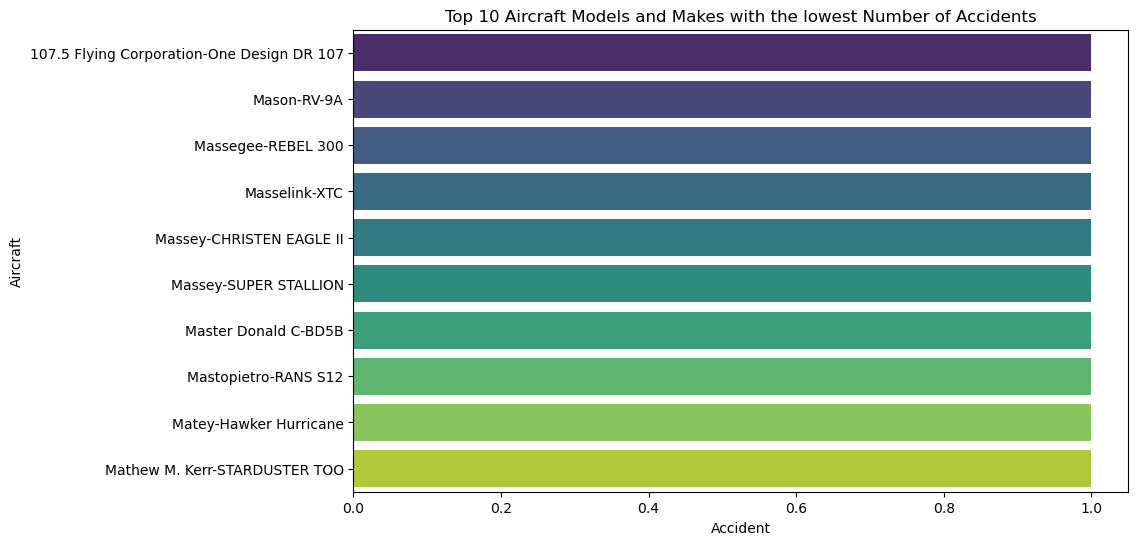

In [22]:
# Plot top 10 aircraft models and makes with the highest number of accidents
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident', y='Aircraft', data=top_10_aircrafts, palette='viridis')
plt.title('Top 10 Aircraft Models and Makes with the lowest Number of Accidents')
plt.xlabel('Accident')
plt.ylabel('Aircraft')
plt.show()


In [23]:
#Lets get the top 10 makes aircrafts with the highest accidents
accident_counts2 = DF.groupby(['Aircraft']).size().reset_index(name='Accident')
top_10_Aircraft2 = accident_counts2.sort_values(by='Accident', ascending=False).head(10)

print(top_10_Aircraft2)


              Aircraft  Accident
4476        Cessna-152      2142
4498        Cessna-172      1214
4541       Cessna-172N       979
12772  Piper-PA-28-140       802
4451        Cessna-150       703
4539       Cessna-172M       659
4544       Cessna-172P       590
12668      Piper-PA-18       537
4475       Cessna-150M       535
12782  Piper-PA-28-180       496


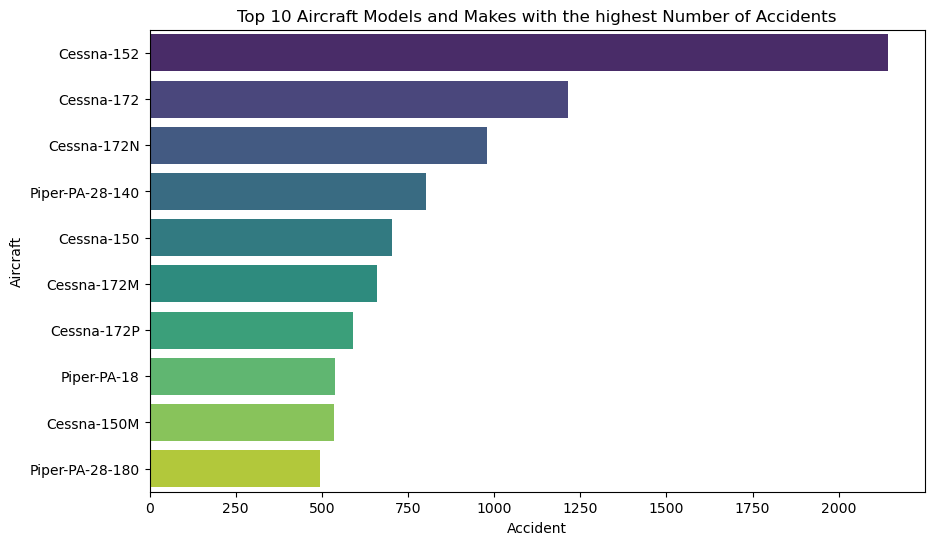

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident', y='Aircraft', data=top_10_Aircraft2, palette='viridis')
plt.title('Top 10 Aircraft Models and Makes with the highest Number of Accidents')
plt.xlabel('Accident')
plt.ylabel('Aircraft')
plt.show()


### Explanation:
From the bar plots above we have seen the Aircarft with the highest number of accidents is Cessna-152 with 2142 acident counts followed by Cessna-172 with 1214 acccidents and Cessna-172N with 979 counts.
The ten Aircrafts with the least numer of accidents include: 107.5 Flying Corporation-One Design DR 107, Mason-RV-9A and  Massegee-REBEL. All have occured once                                     

In [25]:
#Lets check for aircrafts that had the highest number of total injuries
injuries_per_aircraft = DF.groupby('Aircraft')['Total.Injuries'].sum().reset_index()

sorted_injuries = injuries_per_aircraft.sort_values(by='Total.Injuries', ascending=False)
top_10_injuries = sorted_injuries.head(10)
top_10_injuries


,Aircraft,Total.Injuries
4476,Cessna-152,906.0
12772,Piper-PA-28-140,865.0
4541,Cessna-172N,814.0
4498,Cessna-172,681.0
12789,Piper-PA-28-181,621.0
4539,Cessna-172M,555.0
12782,Piper-PA-28-180,531.0
4544,Cessna-172P,510.0
2715,Bell-206B,497.0
3201,Boeing-737-200,475.0


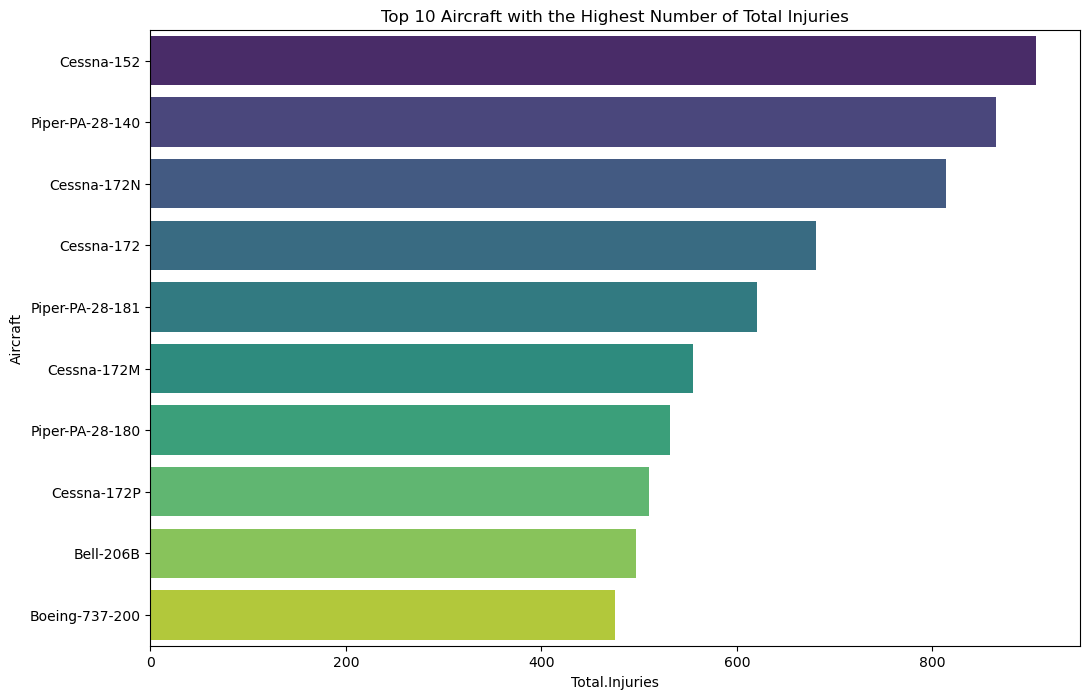

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total.Injuries', y='Aircraft', data=top_10_injuries, palette='viridis')
plt.title('Top 10 Aircraft with the Highest Number of Total Injuries')
plt.xlabel('Total.Injuries')
plt.ylabel('Aircraft')
plt.show()

In [27]:
injuries_per_aircraft = DF.groupby('Aircraft')['Total.Injuries'].sum().reset_index()

# Sort by 'Total.Injuries' in ascending order to get the least injuries
sorted_injuries = injuries_per_aircraft.sort_values(by='Total.Injuries', ascending=True)

# Get the bottom 10 aircraft with the least total injuries
last_10_injuries = sorted_injuries.head(10)
last_10_injuries

,Aircraft,Total.Injuries
8614,Heinemann-ROTORWAY EXECUTIVE,0.0
12196,PIPER-PA22/135,0.0
12198,PIPER-PA23-250,0.0
12200,PIPER-PA24-260,0.0
12202,PIPER-PA25 - 260,0.0
12204,PIPER-PA28 - 140,0.0
5566,"Creitz, Robert D-RV-3",0.0
12205,PIPER-PA28 - 160,0.0
5564,Creed-RV-4,0.0
5563,Creed-LANCAIR 235,0.0


### Explanation:
From the bar plots above we have seen the Aircarft with the highest number of total injuries is Cessna-152 with 906.0 total injuries  followed by 12782 Piper-PA-28-140 with 865.0 injuries and 4546 Cessna-172N with 814.0 injuries. The ten Aircrafts with the least numer of accidents include: Heinemann-ROTORWAY EXECUTIVE	, PIPER-PA24-260 and PIPER-PA25 - 260. All do not have injured victims

In [28]:
#Lets get the Aircraft with who degree of damage was minor
DFminor=DF[DF['Aircraft.damage']=='Minor']
DFminor

,Event.Id,Event.Date,Investigation.Type,Make,Model,Engine.Type,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Injuries,Aircraft
230,20020917X01910,1982-02-03,Accident,Mcdonnell-douglas,DC-10-10,Turbo Fan,Minor,0.0,1.0,0.0,154.0,IMC,1.0,Mcdonnell-douglas-DC-10-10
242,20020917X02585,1982-02-06,Accident,Boeing,A75N1,Reciprocating,Minor,0.0,0.0,0.0,3.0,VMC,0.0,Boeing-A75N1
244,20020917X02173,1982-02-06,Accident,Bellanca,7KCAB,Reciprocating,Minor,0.0,0.0,0.0,3.0,VMC,0.0,Bellanca-7KCAB
446,20020917X01673,1982-03-01,Accident,Piper,PA-25-235,Reciprocating,Minor,1.0,0.0,1.0,1.0,VMC,2.0,Piper-PA-25-235
535,20020917X01716,1982-03-11,Accident,Beech,95-55,Reciprocating,Minor,0.0,0.0,0.0,2.0,IMC,0.0,Beech-95-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87412,20220212104630,2022-02-11,Accident,GREAT LAKES,2T-1A-2,Reciprocating,Minor,0.0,0.0,0.0,2.0,VMC,0.0,GREAT LAKES-2T-1A-2
87418,20220216104650,2022-02-12,Accident,BELL,206,Turbo Shaft,Minor,0.0,0.0,1.0,3.0,VMC,1.0,BELL-206
87932,20220608105217,2022-06-07,Accident,BOMBARDIER,BD100 1A10,Turbo Shaft,Minor,0.0,0.0,0.0,11.0,VMC,0.0,BOMBARDIER-BD100 1A10
88257,20220730105623,2022-07-28,Accident,HOLLIER B C,VANS RV-8,Reciprocating,Minor,0.0,0.0,0.0,2.0,VMC,0.0,HOLLIER B C-VANS RV-8


In [29]:
#Lets get a new csv for tableau presentation for least damage per aircraft
minor_counts = DFminor.groupby(['Aircraft']).size().reset_index(name='Aircraft.damage')
least_damaged= minor_counts.sort_values(by='Aircraft.damage', ascending=True)
least_damaged

,Aircraft,Aircraft.damage
0,AERONCA-65 CA,1
308,Hughes-269C,1
307,Hughes Aero-Predator,1
306,Homebuilt-RV-6,1
305,Hoac Austria-HK 36R SUPER DIMONA,1
...,...,...
175,Cessna-172,6
173,Cessna-150M,6
169,Cessna-150,6
180,Cessna-172M,6


In [30]:
least_damaged.to_csv('least_damaged.csv',index=False)

In [31]:
#get the ten aircrafts with least minor damages

minor_counts = DFminor.groupby(['Aircraft']).size().reset_index(name='Aircraft.damage')
least_damaged= minor_counts.sort_values(by='Aircraft.damage', ascending=True).head(10)
print(least_damaged)


                             Aircraft  Aircraft.damage
0                       AERONCA-65 CA                1
308                       Hughes-269C                1
307              Hughes Aero-Predator                1
306                    Homebuilt-RV-6                1
305  Hoac Austria-HK 36R SUPER DIMONA                1
304                  Hiller-soloy-12E                1
303                     Hiller-UH-12E                1
302                       Head-AX8 88                1
301        Head Balloons, Inc.-AX8-88                1
300    Hawker Beechcraft Corp.-65-B80                1


Text(0.5, 1.0, 'Top 10 Least Damaged Aircraft')

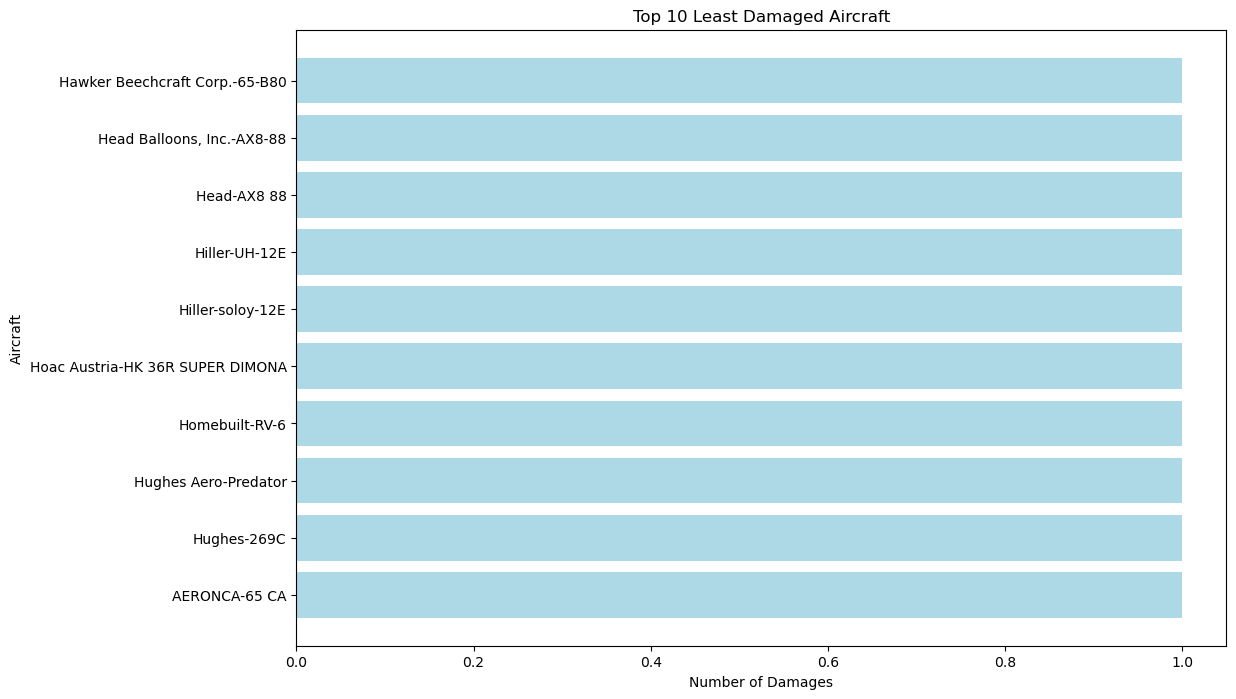

In [32]:
plt.figure(figsize=(12, 8))
plt.barh(least_damaged['Aircraft'], least_damaged['Aircraft.damage'], color='lightblue')
plt.xlabel('Number of Damages')
plt.ylabel('Aircraft')
plt.title('Top 10 Least Damaged Aircraft')

### Explanation
The aircraft with the least damage include:AERONCA-65 CA, Hughes-269C and Hughes Aero-Predator.


In [33]:
#Lets get a new csv for tableau presentation for total injuries per aircraft
DF.to_csv('Aviation_cleaned.csv',index=False)


### Recommendation
1. We should consider purchasing an Aircraft with the least number of accidents, least number of injured passengers and least damaged aircraft after an accident
2. We should consider more research as the finding in this particular data set is skewed ad may not be a true represantion of the actual situation.
3. We should also look at other ways of choosing an Aircraft. Based on the finding above, we haven't been able to get one aircraft that meets all the three variables being tested to confirm flight safety